**Zachary Jock  
Mathematic and Scientific Computing  
April 16, 2024**

In [1]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
50456718 % 31

2

### Assigned Tartan: Recovery

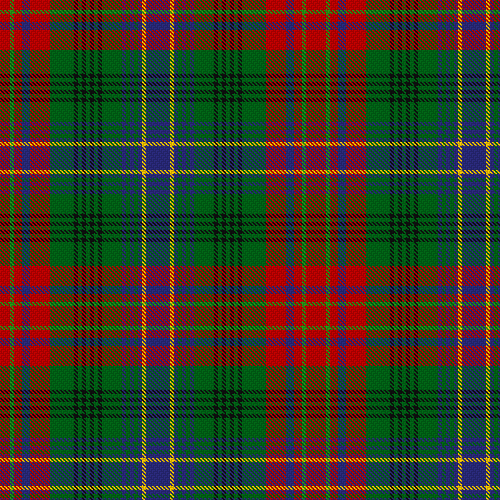

In [3]:
display.Image("https://rahollis.github.io/_images/Recovery.png")

In [4]:
def show_tartan(pattern, colors, n):
    pd = {} # Create an empty dictionary for pattern code to be stored as variables
    plist = pattern.split() # Create a list of our stripes from the pattern input separated by commas
    pat_id = [] # The color abbreviation in our pattern indices (i.e. the letters)
    pat_len = [] # The length of the stripe in the pattern (i.e. the numbers)
    for i in plist: # Loop through the stripes in our pattern list
        #Assign string and num variables as empty str() values
        string = "" 
        num = ""
        for char in i: # Loop through the characters of each stripe
            if char.isdigit(): #If the character in the stripe is a number, append to our num variable
                num += char
            else: 
                string += char  #If the character in the stripe is a letter, append to our string variable
        if num: #convert the numbers in our num variable into integers for compatibility with later math operations
            num = int(num)
        pat_id.append(string) #Pattern list with only the colors for each stripe
        pat_len.append(num) #Pattern list with only the stripe length for each stripe
    for iidx in range(len(pat_id)): # Loop through the index of the colors-only stripe list
        # A key in our pd dictionary is created to represent a each stripe as the name for a variable
        pd[plist[iidx]] = np.zeros((n,pat_len[iidx],3)) #Array of zeroes created with n length and width being set by stripe length for specified stripe in pattern
        # Assign colors to the specified stripe according to the letter combination in our pattern list.
        # RGB value for the np array will be replaced with the RGB values assigned to the key in our colors dictionary with the matching pat_id name.
        pd[plist[iidx]][:,:,0] = colors[pat_id[iidx]][0]
        pd[plist[iidx]][:,:,1] = colors[pat_id[iidx]][1]
        pd[plist[iidx]][:,:,2] = colors[pat_id[iidx]][2]
    # The arrays assigned to each stripe in the pattern are converted to a list and concatenated to create an image of vertical stripes of varying colors and sizes
    vert = np.concatenate(list(pd.values()), axis = 1)
    #Stripes are repeatedly concatenated until they fill the nxn dimension defined by the user.
    # Colors are divided by 255 to avoid error for RGB accuracy
    vert = np.concatenate([vert]*(n//vert.shape[1]+1), axis=1)[:,:n,:]/255
    # Vertical output image is transposed, with row x col becoming col x row to create horizontal image output
    horiz = np.transpose(vert,axes=(1,0,2))
    def weave(): #Function to combine both horizontal and vertical stripe patterns into our tartan
        tartan = np.zeros((n,n,3)) #Create empty array according to nxn dimensions and 3 sheets
        #Loop through row and column index of blank tartan array
        for i in range(n):
            for j in range(n):
                #Pixels from vert and horiz will be rendered in an alternating staircase pattern, repeating every 4 pixels. The pattern will shift by one pixel for every row.
                if (i-j)%4 == 0 or (i+j)%4 == 3: #i and j coordinates are subtracted to find a number value (for the horiz pixels the numbers will either be 0,-1, or 3). 
                    tartan[i,j,:] = horiz[i,j,:] #If the result for our number modulo 4 is 0 or 3, the pixel from our horiz array will be rendered for that index of the blank tartan array
                else: # For any index where our coordinate pair modulo 4 is not 0 or 3, the index in the tartan will render a pixel from the vert array.
                    tartan[i,j,:] = vert[i,j,:]
        plt.imshow(tartan) #Generate weaved tartan complete with RGB data
        plt.show() #Display the tartan on a number grid
    weave() #Perform tartan weave function

In [5]:
recovery = "R10 LG4 R8 B8 R20 G24 K4 G4 K4 G4 K4 G4 K4 G20 B4 G4 B4 G4 B4 YY4 B24 YY4 B4 G4 B4 G4 B4 G20 K4 G4 K4 G4 K4 G4 K4 G24 R20 B8 R8 LG4 R10"

In [6]:
recovery_colors = {
"K" : [16, 16, 16],
"R" : [200, 0, 0],
"YY" : [252, 204, 0],
"G" : [0, 104, 24],
"B" : [44, 44, 128],
"LG" : [40, 156, 24]
}

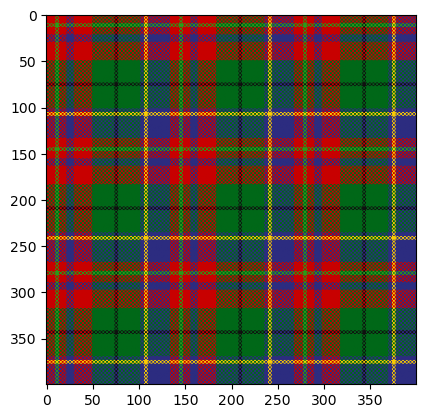

In [7]:
show_tartan(recovery,recovery_colors,400)

### Miscellaneous Tartans

#### Carson Red

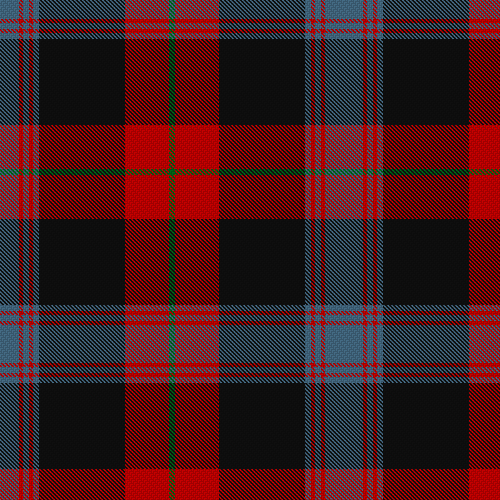

In [8]:
display.Image("https://rahollis.github.io/_images/CarsonRed.png")

In [9]:
carson_red = "A19 R4 A6 R4 A6 K86 R44 G6 R44 K86 A6 R4 A6 R4 A19"

In [10]:
carson_colors = {
"R" : [200, 0, 0],
"K" : [16, 16, 16],
"G" : [0, 104, 24],
"A" : [68, 108, 132]
}

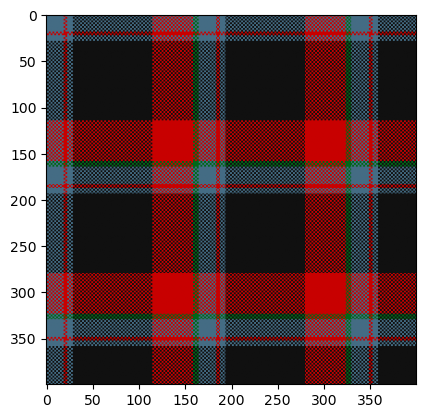

In [11]:
show_tartan(carson_red,carson_colors,400)

#### Gunn Clan

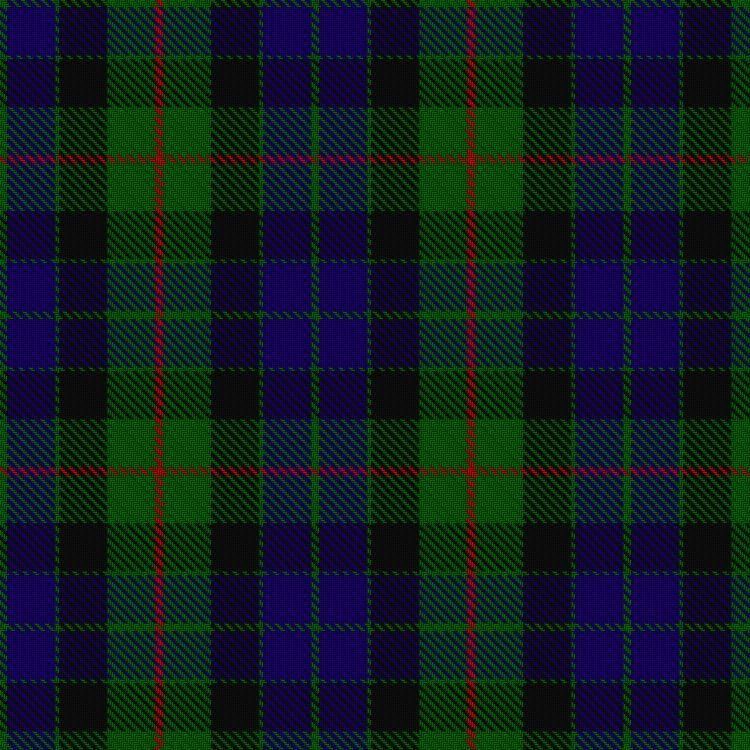

In [12]:
display.Image("https://i.pinimg.com/originals/6c/22/8d/6c228dc78c34ceaae1aa15e39d17c212.jpg")

In [13]:
gunn = "DG4 DB24 DG2 K24 DG24 R4"

In [14]:
gunn_colors = {"DG":[0,100,0],"DB":[28,0,112],"K":[16,16,16],"R":[200,0,0]}

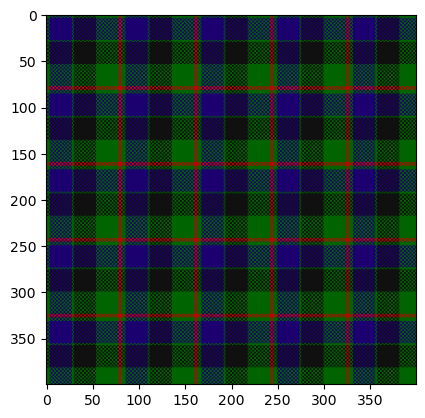

In [15]:
show_tartan(gunn,gunn_colors,400)

#### Beatty

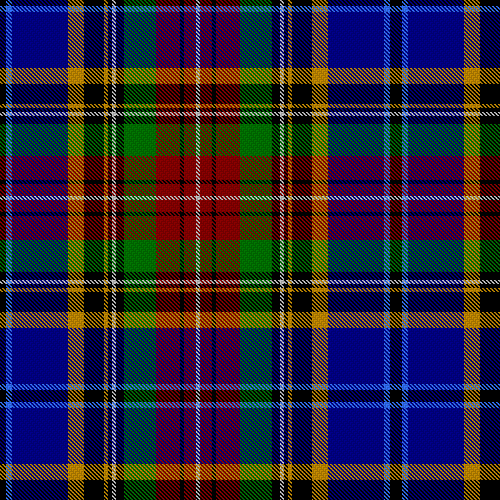

In [16]:
display.Image("https://rahollis.github.io/_images/Beatty.png")

In [17]:
beatty = "K6 FSB6 RB56 MY16 K20 MY4 K4 LN4 K8 G32 DR24 K4 DR12 LN4 DR12 K4 DR24 G32 K8 LN4 K4 MY4 K20 MY16 RB56 FSB6 K6"

In [18]:
beatty_colors = {
"RB" : [0, 0, 140],
"G" : [0, 120, 0],
"DR" : [140, 0, 0],
"MY" : [200, 140, 0],
"K" : [0, 0, 0],
"LN" : [200, 200, 200],
"FSB" : [52, 116, 252]
}

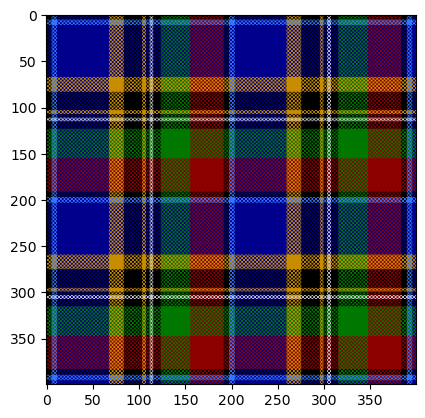

In [19]:
show_tartan(beatty,beatty_colors,400)